In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
experiment_design = {
    1: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    2: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    3: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    4: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    5: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    6: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    7: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    8: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    9: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    10: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'}
}

In [9]:
time_data = {
    1: {'Prog-1': 104, 'Prog-2': 71.3},
    2: {'Prog-1': 102, 'Prog-2': 110},
    3: {'Prog-1': 159, 'Prog-2': 178},
    4: {'Prog-1': 168, 'Prog-2': 153},
    5: {'Prog-1': 150, 'Prog-2': 120},
    6: {'Prog-1': 151, 'Prog-2': 174},
    7: {'Prog-1': 111, 'Prog-2': 94.9},
    8: {'Prog-1': 105, 'Prog-2': 86.1},
    9: {'Prog-1': 137, 'Prog-2': 115},
    10: {'Prog-1': 124, 'Prog-2': 175}
}

In [10]:
# Extract Prog-1 and Prog-2 times
prog1_times = [time_data[prog]['Prog-1'] for prog in time_data]
prog2_times = [time_data[prog]['Prog-2'] for prog in time_data]

# 1. Summary Statistics
prog1_mean = np.mean(prog1_times)
prog2_mean = np.mean(prog2_times)
prog1_std = np.std(prog1_times)
prog2_std = np.std(prog2_times)

print(f"Prog-1: Mean = {prog1_mean:.2f}, Std Dev = {prog1_std:.2f}")
print(f"Prog-2: Mean = {prog2_mean:.2f}, Std Dev = {prog2_std:.2f}")

Prog-1: Mean = 131.10, Std Dev = 23.76
Prog-2: Mean = 127.73, Std Dev = 37.51


In [16]:
# Calculate the difference between Prog-1 and Prog-2
time_diffs = [prog1_times[i] - prog2_times[i] for i in range(len(prog1_times))]

time_diff_mean = np.mean(time_diffs)
time_diff_std = np.std(time_diffs)

print(f"Time diff Prog-1/Prog-2: Mean = {time_diff_mean:.2f}, Std Dev = {time_diff_std:.2f}")

Time diff Prog-1/Prog-2: Mean = 3.37, Std Dev = 25.95


The mean difference between Prog-1 and Prog-2 is small (3.37 minutes), and the standard deviation (25.95) is large relative to the mean, suggesting that there might not be a large, consistent difference between the two programs. However, a formal statistical test, such as a paired t-test, is needed to confirm whether this difference is statistically significant.

#### Why a Statistical Test is Needed:
- The fact that the mean difference is small and the standard deviation is large does suggest that the performance times for Prog-1 and Prog-2 may not be significantly different.
- But to confirm this, a t-test would compare the means and provide a p-value to indicate whether the observed difference could have happened by chance.

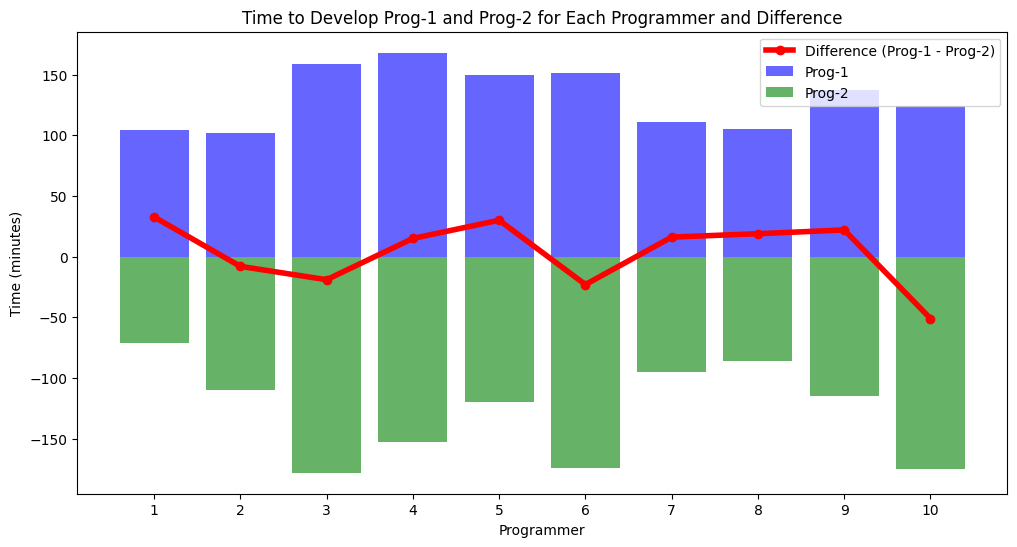

In [39]:
# 2. Visualization: Prog-1 in positive direction, Prog-2 in negative, and the difference as a line graph
plt.figure(figsize=(12, 6))

# Plot Prog-1 in the positive direction
plt.bar(time_data.keys(), prog1_times, label='Prog-1', color='blue', alpha=0.6)

# Plot Prog-2 in the negative direction
plt.bar(time_data.keys(), [-t for t in prog2_times], label='Prog-2', color='green', alpha=0.6)

# Plot the difference between Prog-1 and Prog-2 as a line graph
plt.plot(time_data.keys(), time_diffs, label='Difference (Prog-1 - Prog-2)', color='red', marker='o', linewidth=4)

# Add labels and title
plt.xlabel('Programmer')
plt.ylabel('Time (minutes)')
plt.title('Time to Develop Prog-1 and Prog-2 for Each Programmer and Difference')

# Ensure x-axis shows programmer numbers from 1 to 10
plt.xticks(list(time_data.keys()), [str(prog) for prog in time_data.keys()])

plt.legend()
plt.show()